# Matplotlib plot Shapefile

In [1]:
import os
from osgeo import ogr
from matplotlib.collections import PatchCollection

SHAPEF_DIR = '/Volumes/kduNTfs128/geo_data/RG2017_rgint_20180911'
SHAPEFILE_INPUT = '/Volumes/kduNTfs128/geo_data/RG2017_rgint_20180911'
# open ShepFile de Poligonos
drvr = ogr.GetDriverByName('ESRI Shapefile')
ds_pol = drvr.Open(SHAPEFILE_INPUT, 0)
layr_pol = ds_pol.GetLayer()
layr_pol_def = layr_pol.GetLayerDefn()

In [2]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib import pyplot 


In [3]:
feature = layr_pol.GetFeature(0)

In [4]:
geomref = feature.GetGeometryRef()

In [5]:
p = geomref.Centroid()

In [6]:
x, y, z = p.GetPoint()

In [7]:
geomref.GetGeometryCount()

1

In [8]:
xmin, xmax, ymin, ymax = geomref.GetEnvelope()

In [9]:
geom  = geomref.GetGeometryRef(0)

In [10]:
vertices = [(x, y) for x, y, z in geom.GetPoints()]

In [11]:
vertices

[(-63.32720817699989, -7.976720298999997),
 (-63.11838271099995, -7.977107170999943),
 (-62.868021131999924, -7.9758752249999745),
 (-62.86661657199997, -7.975868296999934),
 (-62.86017010499994, -7.982323287999961),
 (-62.85336056599989, -7.987563267999999),
 (-62.84505574299993, -7.986531251999963),
 (-62.841609785999914, -7.994972725999951),
 (-62.83283330599992, -7.994371601999951),
 (-62.82572221999996, -8.007521357999948),
 (-62.821003078999944, -8.014495549999946),
 (-62.81433557000001, -8.018363442999966),
 (-62.809996532999904, -8.025339639999952),
 (-62.80175557899999, -8.025656024999929),
 (-62.79430185899993, -8.027547863999963),
 (-62.786200315, -8.026343000999926),
 (-62.77983729199995, -8.031259432999928),
 (-62.772192391999965, -8.03149396399997),
 (-62.76527778400001, -8.036045663999992),
 (-62.757889010999996, -8.038437442000003),
 (-62.75180219199997, -8.043555611999999),
 (-62.74397249499997, -8.045286066000003),
 (-62.73803159599994, -8.050068630999942),
 (-62.7331

In [12]:
pol = mpatches.Polygon(vertices)

In [13]:
patch = mpatches.PathPatch(pol, facecolor='#6CA043', edgecolor='#1D388C')

In [14]:
geom.GetArea()

10.31244408947281

In [15]:
x

-63.747986524427034

In [16]:
y

-9.942811793174531

In [17]:
from matplotlib.patches import Circle

In [18]:
c = Circle((x,y), 0.1, facecolor='#6CA043', edgecolor='#1D388C')

In [19]:
c

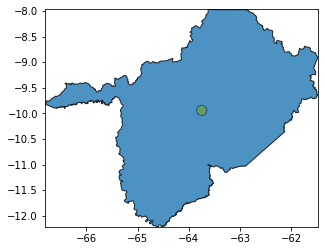

In [21]:
# Prepare figure
pyplot.ioff()
pyplot.subplot(1,1,1)
ax = pyplot.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#ax.add_patch(pol)
p = PatchCollection([pol,c], alpha=0.8, match_original=True, )

ax.add_collection(p)
ax.set_aspect(1.0)
pyplot.show()